<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_RA_2024/blob/main/03_19_Meeting_Factiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Library Installatioon

In [1]:
# https://github.com/dfreelon/news_extract
! pip install news_extract
! pip install wordcloud

! pip install spacy
! python -m spacy download en_core_web_lg

! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


# Make the dataset

In [6]:
import news_extract as ne

df_headlines = []
df_sources = []
df_texts = []
df_dates = []

for number in range(0, 29):
  print(number)
  fc_file = f'/content/10_zero_{number}.txt'
  fc_data = ne.factiva_extract(fc_file)

  for i in fc_data:
    df_headlines.append(i["HD"])
    df_sources.append(i["SN"])
    df_texts.append(i["TXT"])
    df_dates.append(i["PD"])

import pandas as pd

df = pd.DataFrame({"Source":df_sources,
                   "Date":df_dates,
                   "Headline":df_headlines,
                   "Text":df_texts})

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Source    2806 non-null   object
 1   Date      2806 non-null   object
 2   Headline  2806 non-null   object
 3   Text      2806 non-null   object
dtypes: object(4)
memory usage: 87.8+ KB


In [8]:
df["Source"].value_counts(normalize=True)

Washington Post.com             0.338204
Dow Jones Institutional News    0.259444
The New York Times              0.204562
The Wall Street Journal         0.075196
Reuters News                    0.075196
Business Insider                0.029936
USA Today                       0.016750
USA Today (Newspaper)           0.000713
Name: Source, dtype: float64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df["Date"].value_counts().sort_index()

2014-01-03    1
2014-01-04    2
2014-01-05    2
2014-01-06    1
2014-01-09    1
             ..
2023-12-13    1
2023-12-17    1
2023-12-18    1
2023-12-20    1
2023-12-31    1
Name: Date, Length: 1706, dtype: int64

# Sentiment

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in df.iterrows():
    score = analyzer.polarity_scores(row['Text'])['compound']
    sentiment_scores.append(score)

df['Sentiment'] = sentiment_scores


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head(2)

,Source,Date,Headline,Text,Sentiment
0,Dow Jones Institutional News,2014-01-03,*Fed's Bernanke: Even Low Inflation Can Create...,3 Jan 2014 16:36 EDT Bernanke Says Even Low In...,-0.7430
1,Dow Jones Institutional News,2014-01-04,A Different Dimension -- Barron's,(FROM BARRON'S 1/6/14) By Beverly Goodman It w...,0.9996


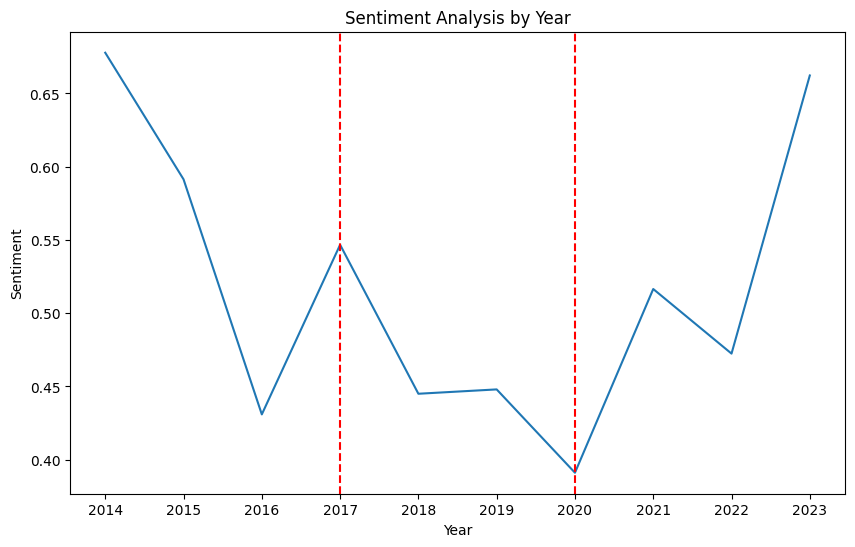

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Sentiment", errorbar=None)

plt.title('Sentiment Analysis by Year')
plt.xticks(df["Year"].unique())

plt.axvline(x=2017, color='r', linestyle='--', label='2017')
plt.axvline(x=2020, color='r', linestyle='--', label='2020')

plt.show()

# Donald Trump's tenure as the 45th president of the United States began with his
# inauguration on January 20, 2017, and ended on January 20, 2021.


In [ ]:
df.groupby("Source")["Sentiment"].mean()

Source
Business Insider                0.515927
Dow Jones Institutional News    0.670002
Reuters News                    0.448556
The New York Times              0.507643
The Wall Street Journal         0.477719
USA Today                       0.357404
USA Today (Newspaper)           0.001250
Washington Post.com             0.431205
Name: Sentiment, dtype: float64

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

yearly_sentiment = df.groupby(['Year', 'Source'])['Sentiment'].mean().reset_index()

yearly_sentiment

,Year,Source,Sentiment
0,2014,Dow Jones Institutional News,0.822525
1,2014,Reuters News,0.686889
2,2014,The New York Times,0.530445
3,2014,The Wall Street Journal,0.489452
4,2014,USA Today,-0.952350
...,...,...,...
62,2023,Reuters News,0.613629
63,2023,The New York Times,0.542937
64,2023,The Wall Street Journal,0.806474
65,2023,USA Today,0.495500


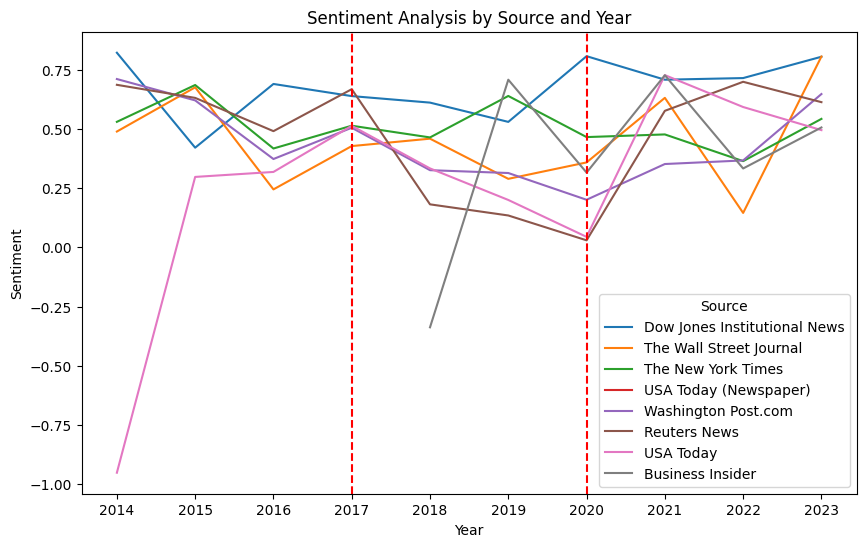

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Sentiment", hue="Source", errorbar = None)

plt.title('Sentiment Analysis by Source and Year')
plt.xticks(df["Year"].unique())

plt.axvline(x=2017, color='r', linestyle='--', label='2017')
plt.axvline(x=2020, color='r', linestyle='--', label='2020')

plt.show()

In [ ]:
df[(df["Source"] == "USA Today") & (df["Sentiment"]<0)]

,Source,Date,Headline,Text,Sentiment,Year
164,USA Today,2014-07-30,Cold wars aren't what they used to be,Nothing stirs up the specter of the Cold War l...,-0.9977,2014
263,USA Today,2014-12-22,Old media's battle plan against digital ; Sony...,"For nearly a generation, it's been an either/o...",-0.9070,2014
331,USA Today,2015-03-30,Ken Burns cancer series is a different kind of...,"Ken Burns' new documentary, Cancer: The Empero...",-0.9926,2015
386,USA Today,2015-05-27,"In public debates, give the 'bigot' bomb a bre...",A lesbian couple purchased engagement rings fr...,-0.9933,2015
676,USA Today,2016-09-22,"Few answers, but plenty of speculation ; Jolie...",A day after news broke about the impending div...,-0.9862,2016
740,USA Today,2016-11-30,Trump's trade talk stokes worry ; China has sa...,"For Dave Shogren, Donald Trump's campaign-trai...",-0.9880,2016
821,USA Today,2017-02-22,We need to stop robots from stealing our jobs,LETTERS Mark Cuban and Bill Gates are correctl...,-0.9322,2017
1448,USA Today,2018-07-31,Manafort trial to test Trump and Mueller,'Witch hunt' claim could end up looking desper...,-0.9685,2018
1670,USA Today,2019-03-19,Students in college scandal could face the music,Some students actively participated in the che...,-0.9883,2019
1700,USA Today,2019-05-07,"In DC, a battle of the branches",WASHINGTON – It's way beyond saber-rattling. F...,-0.9980,2019


# Topic modeling

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Source    2806 non-null   object        
 1   Date      2806 non-null   datetime64[ns]
 2   Headline  2806 non-null   object        
 3   Text      2806 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 87.8+ KB


In [13]:
df.head(2)

,Source,Date,Headline,Text
0,Dow Jones Institutional News,2014-01-03,*Fed's Bernanke: Even Low Inflation Can Create...,3 Jan 2014 16:36 EDT Bernanke Says Even Low In...
1,Dow Jones Institutional News,2014-01-04,A Different Dimension -- Barron's,(FROM BARRON'S 1/6/14) By Beverly Goodman It w...


In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

from gensim import corpora
from gensim.models.ldamodel import LdaModel

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load English stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords_to_add = {'http', 'thing', 'HTTP', 'Http', 'https', 'things', 'percent', 'say', 'says', 'really'}
stop_words.update(custom_stopwords_to_add)

lemmatizer = WordNetLemmatizer()
texts = [
    [lemmatizer.lemmatize(word) for word in word_tokenize(document.lower())
     if word.isalpha() and word not in stop_words and len(word)>3]
    for document in df['Text']
]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=1, no_above=0.5)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Building the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=100,
                     update_every=1, chunksize=1000, passes=10, alpha='auto', per_word_topics=True)

# Displaying the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(0, '0.006*"political" + 0.005*"right" + 0.005*"white" + 0.004*"america" + 0.004*"democracy" + 0.004*"life" + 0.004*"politics" + 0.004*"power" + 0.003*"book" + 0.003*"history"')
(1, '0.007*"think" + 0.006*"going" + 0.005*"know" + 0.004*"team" + 0.004*"want" + 0.004*"woman" + 0.003*"life" + 0.003*"work" + 0.003*"back" + 0.003*"feel"')
(2, '0.017*"republican" + 0.015*"trump" + 0.011*"democrat" + 0.010*"party" + 0.008*"voter" + 0.008*"house" + 0.007*"election" + 0.006*"vote" + 0.006*"democratic" + 0.006*"biden"')
(3, '0.016*"school" + 0.014*"student" + 0.010*"university" + 0.009*"college" + 0.008*"black" + 0.006*"education" + 0.005*"court" + 0.005*"child" + 0.005*"admission" + 0.005*"harvard"')
(4, '0.022*"company" + 0.007*"business" + 0.006*"million" + 0.005*"vaccine" + 0.005*"industry" + 0.004*"billion" + 0.004*"employee" + 0.004*"service" + 0.004*"executive" + 0.004*"technology"')
(5, '0.028*"china" + 0.013*"united" + 0.011*"chinese" + 0.008*"russia" + 0.007*"official" + 0.006*"foreign

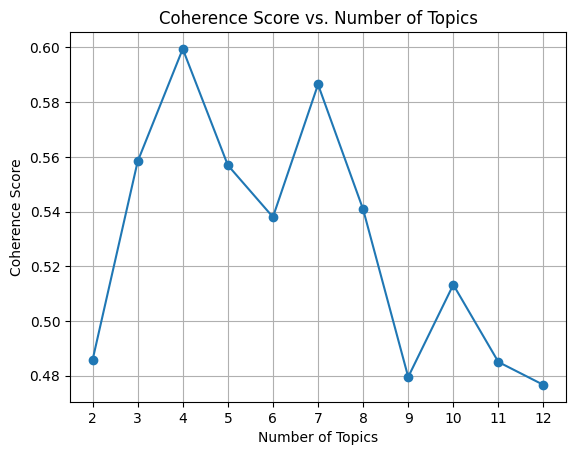

In [15]:

import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# Initialize empty lists to store the coherence scores
coherence_scores = []

# Define a range of numbers of topics to try
num_topics_range = range(2, 13)  # Adjust the range as needed

# Iterate over different numbers of topics
for num_topics in num_topics_range:
    # Build the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Append coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()



In [26]:
import pandas as pd

top_n_words = 30

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

topics = lda_model.print_topics(num_words=top_n_words)

topic_df = pd.DataFrame(columns=['Topic Number', 'Frequent Words'])

for topic_num, words in topics:
    clean_words = ', '.join(word for word, _ in lda_model.show_topic(topic_num, topn=top_n_words))
    topic_df = topic_df.append({'Topic Number': topic_num, 'Frequent Words': clean_words}, ignore_index=True)

topic_df

<ipython-input-26-10417c270eee>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_df = topic_df.append({'Topic Number': topic_num, 'Frequent Words': clean_words}, ignore_index=True)
<ipython-input-26-10417c270eee>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_df = topic_df.append({'Topic Number': topic_num, 'Frequent Words': clean_words}, ignore_index=True)
<ipython-input-26-10417c270eee>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_df = topic_df.append({'Topic Number': topic_num, 'Frequent Words': clean_words}, ignore_index=True)
<ipython-input-26-10417c270eee>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Topic Number,Frequent Words
0,0,"black, student, woman, white, university, raci..."
1,1,"addiction, treatment, opioid, program, care, s..."
2,2,"trump, republican, party, court, biden, democr..."
3,3,"america, power, right, nation, political, pand..."
4,4,"company, business, million, executive, employe..."
5,5,"china, united, chinese, official, trump, admin..."
6,6,"drug, health, program, policy, rate, economic,..."
7,7,"market, share, bank, investor, price, stock, a..."


In [27]:
topic_df.to_csv("8_topics_10_years.csv", index=False)

In [26]:
df.head(30)

,Source,Date,Headline,Text
0,Dow Jones Institutional News,2014-01-03,*Fed's Bernanke: Even Low Inflation Can Create...,3 Jan 2014 16:36 EDT Bernanke Says Even Low In...
1,Dow Jones Institutional News,2014-01-04,A Different Dimension -- Barron's,(FROM BARRON'S 1/6/14) By Beverly Goodman It w...
2,The Wall Street Journal,2014-01-04,Declarations: New York's Divider in Chief,Cities sometimes make swerves. That's what New...
3,Dow Jones Institutional News,2014-01-05,Europe Faces Specter of Deflation,Relatively few people alive today in the West ...
4,The New York Times,2014-01-05,Why Everyone Seems to Have Cancer,EVERY New Year when the government publishes i...
5,The New York Times,2014-01-06,Hawaii Makes Its Case for Obama's Library: Why...,HONOLULU -- When Gov. Neil Abercrombie of Hawa...
6,Dow Jones Institutional News,2014-01-09,Last Cent: Dollar Store Is Getting Too Expensive,(FROM THE WALL STREET JOURNAL 1/10/14) By Paul...
7,The Wall Street Journal,2014-01-10,Last Cent: Dollar Store Is Getting Too Expensive,Retailers catering to lower income consumers h...
8,The New York Times,2014-01-12,Blogger's Incarceration Raises First Amendment...,"BIRMINGHAM, Ala. -- For over six years, Roger ..."
9,USA Today (Newspaper),2014-01-13,Prescription: Sick leave ; More employers aske...,A growing number of cities and states are star...


In [37]:
df[df["Text"].str.contains("Economist|Inequality")]

,Source,Date,Headline,Text
10,Dow Jones Institutional News,2014-01-14,*Retail Trade Group Says Holiday Sales Rose 3....,14 Jan 2014 11:40 EDT Retail Trade Group Says ...
11,Dow Jones Institutional News,2014-01-14,U.S. Holiday Sales Rose 3.8% in 2013,"U.S. holiday sales rose moderately last year, ..."
35,Washington Post.com,2014-02-14,Why immigration reform matters; GOP’s refusal ...,"Distilled to their discouraging essence, Repub..."
62,The New York Times,2014-03-09,A Top-Heavy Focus on Income Inequality,I worry about growing income inequality. But I...
82,Washington Post.com,2014-03-25,"Wonkbook: So far, Obama's Europe trip is almos...","Welcome to Wonkbook, Wonkblog's morning policy..."
...,...,...,...,...
2620,Dow Jones Institutional News,2023-04-09,Washington's Asia Policy May Be Setting Itself...,About the authors: Kurt Tong is managing partn...
2621,The Wall Street Journal,2023-04-12,The Game Theory Behind Pickoffs --- A new base...,Baseball fans have historically paid little at...
2646,The New York Times,2023-05-15,'Superstar' Cities Lose Luster as Educated Wor...,Educated workers are increasingly migrating aw...
2746,The New York Times,2023-11-04,"Inequality, Long Ignored by Economists, Is a H...",When the economist Angus Deaton moved to the U...


In [40]:
df[df["Headline"].str.contains("Economists")]

,Source,Date,Headline,Text
2746,The New York Times,2023-11-04,"Inequality, Long Ignored by Economists, Is a H...",When the economist Angus Deaton moved to the U...


In [14]:
Etopic_df.to_csv("8_topics_10_years.csv", index=False)

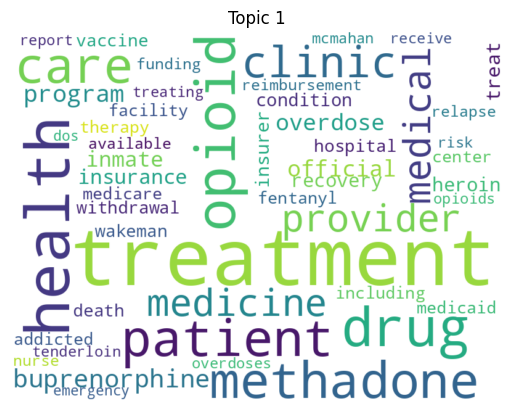

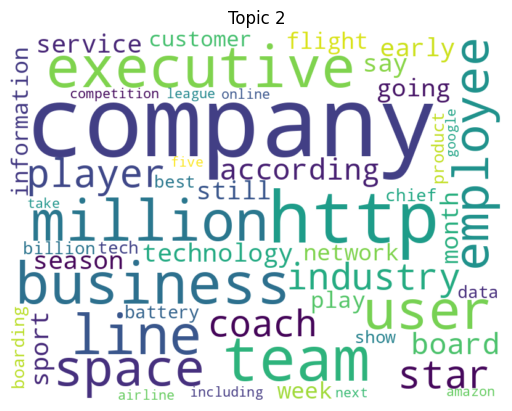

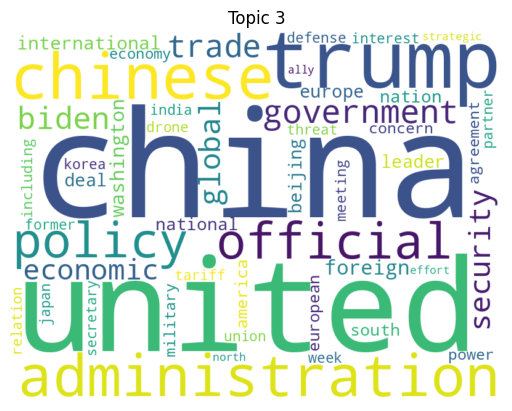

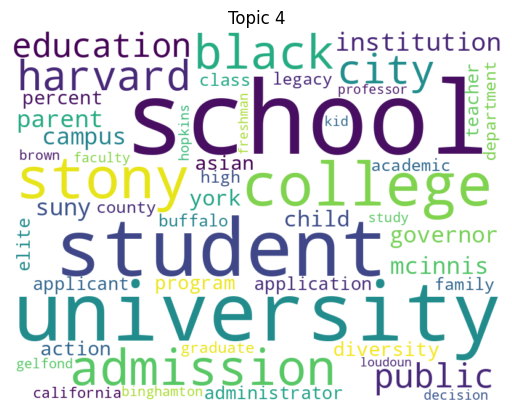

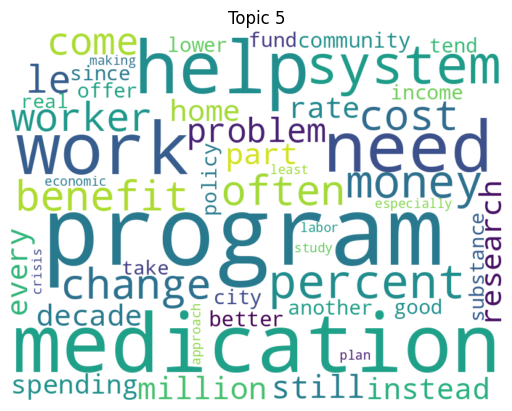

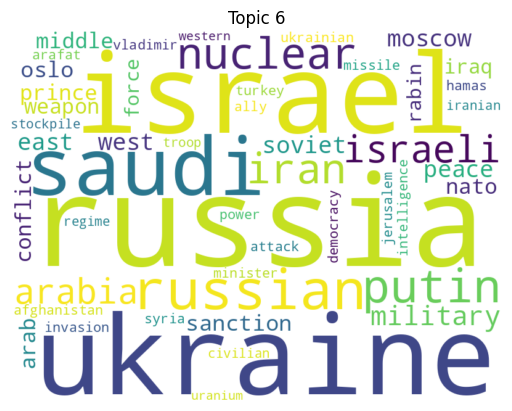

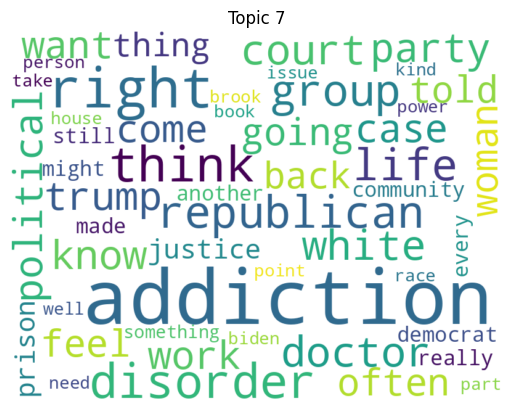

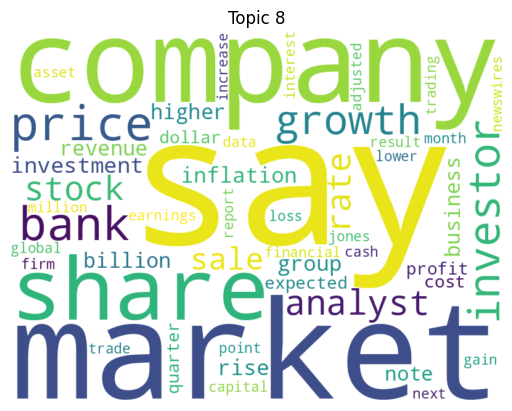

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create word cloud for each topic
def create_word_cloud(lda_model, num_topics):
    for t in range(num_topics):
        plt.figure()
        plt.title(f'Topic {t+1}')

        # Extracting words and their weights for the current topic
        topic_words = dict(lda_model.show_topic(t, topn=50))

        # Generating the word cloud
        wordcloud = WordCloud(width = 800, height = 600,
                              background_color ='white').generate_from_frequencies(topic_words)

        # Displaying the word cloud using matplotlib
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

# Assuming `lda_model` is your trained LdaModel and you have 3 topics
create_word_cloud(lda_model, num_topics=8)

In [16]:
df

,Source,Date,Headline,Text
0,Dow Jones Institutional News,2014-01-03,*Fed's Bernanke: Even Low Inflation Can Create...,3 Jan 2014 16:36 EDT Bernanke Says Even Low In...
1,Dow Jones Institutional News,2014-01-04,A Different Dimension -- Barron's,(FROM BARRON'S 1/6/14) By Beverly Goodman It w...
2,The Wall Street Journal,2014-01-04,Declarations: New York's Divider in Chief,Cities sometimes make swerves. That's what New...
3,Dow Jones Institutional News,2014-01-05,Europe Faces Specter of Deflation,Relatively few people alive today in the West ...
4,The New York Times,2014-01-05,Why Everyone Seems to Have Cancer,EVERY New Year when the government publishes i...
...,...,...,...,...
2801,The New York Times,2023-12-13,"A Role Model, in Multiples","On ''Pink Friday 2,'' the rapper remains a sta..."
2802,The New York Times,2023-12-17,Help and Hope For People With Addiction,"Raina Mcmahan, a 42-year-old recovery coach, s..."
2803,Reuters News,2023-12-18,Lawmakers want Biden to reject export licenses...,WASHINGTON (Reuters) -A group of 15 Republican...
2804,Washington Post.com,2023-12-20,Why do 'gate lice' line up early for a flight?...,The decision of when to get in line to board a...


# Temp

In [1]:
! pip install tmplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00


In [19]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

from gensim import corpora
from gensim.models.ldamodel import LdaModel

import tmplot as tmp

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load English stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords_to_add = {'http', 'thing', 'HTTP'}
stop_words.update(custom_stopwords_to_add)

lemmatizer = WordNetLemmatizer()
texts = [
    [lemmatizer.lemmatize(word) for word in word_tokenize(document.lower())
     if word.isalpha() and word not in stop_words and len(word)>3]
    for document in df['Text']
]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=1, no_above=0.5)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Building the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
! pip install pyldavis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [23]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook(local=True)

# Preparing the visualization data
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Displaying the visualization
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.